# Facebook Prophet

https://facebook.github.io/prophet/docs/quick_start.html#r-api

As an example, let’s look at a time series of the log daily page views for the Wikipedia page for Peyton Manning. We scraped this data using the Wikipediatrend package in R. Peyton Manning provides a nice example because it illustrates some of Prophet’s features, like multiple seasonality, changing growth rates, and the ability to model special days (such as Manning’s playoff and superbowl appearances). 

In [1]:
library(prophet)

Loading required package: Rcpp


In [2]:
df <- read.csv('../datasets/example_wp_log_peyton_manning.csv')

In [3]:
m <- prophet(df)
fit()

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.


Initial log joint probability = -19.4685
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [4]:
future <- make_future_dataframe(m, periods = 365)
tail(future)

ds        
3265 2017-01-14
3266 2017-01-15
3267 2017-01-16
3268 2017-01-17
3269 2017-01-18
3270 2017-01-19

In [6]:
forecast <- predict(m, future)
tail(forecast[c('ds','yhat','yhat_lower','yhat_upper')])

ds         yhat     yhat_lower yhat_upper
3265 2017-01-14 7.824163 7.081197   8.552203  
3266 2017-01-15 8.205942 7.458925   8.932960  
3267 2017-01-16 8.530942 7.751502   9.242808  
3268 2017-01-17 8.318327 7.596537   9.019200  
3269 2017-01-18 8.150948 7.371830   8.842275  
3270 2017-01-19 8.162839 7.445628   8.864664

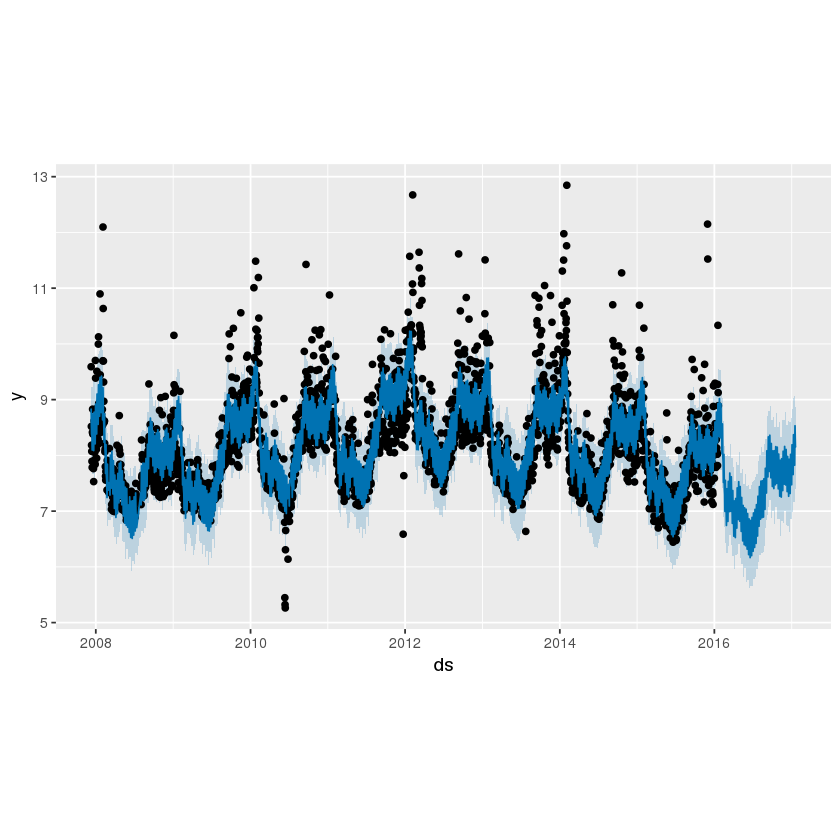

In [7]:
plot(m, forecast)

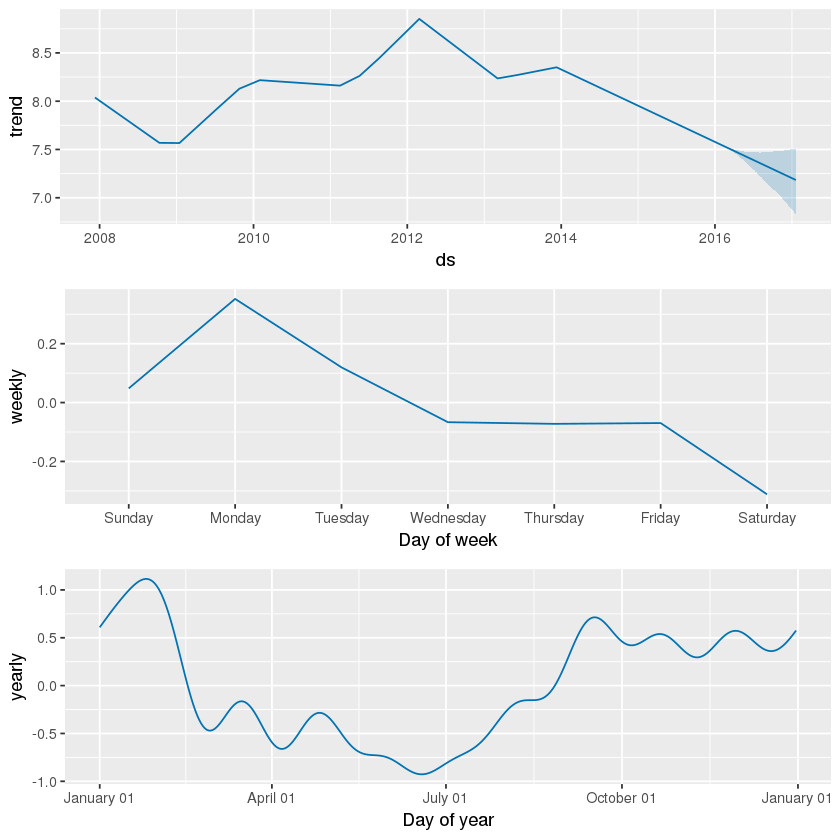

In [9]:
prophet_plot_components(m, forecast)

In [12]:
dyplot.prophet(m, forecast)

ERROR while rich displaying an object: Error in file(file, "rb"): invalid 'description' argument

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_html.htmlwidget(obj)
9.

HTML widgets cannot be represented in plain text (need html)